In [1]:
import os

import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt

## Let's go through an example to see what a single data file looks like

In [15]:
# Directory where the 0-4 Hz filtered signals are stored
data_dir = '/shared/rsaas/nschiou2/EROS/matfiles/pc00-04avg_rs/'

# Example .mat file for subject 127 montage a
pc04 = sio.loadmat(os.path.join(data_dir, 'psc127a.avm'))

### The header file contains information about recording

In [14]:
boxy_hdr = {k: v for (k, v) in zip(list(pc04['boxy_hdr'].dtype.fields), [v[0][0] for v in pc04['boxy_hdr'][0][0]])}
fs = boxy_hdr['sample_rate']
boxy_hdr

{'n_dig_aux': 0,
 'n_a2d_aux': 0,
 'n_dets': 8,
 'n_srcs': 16,
 'n_chans': 128,
 'CCF': 6250,
 'n_skipped': 2,
 'n_waves_avg': 8,
 'n_cycles_avg': 1,
 'n_acq_per_wave': 8,
 'sample_rate': 39.0625,
 'period': 0.0256,
 'period_ms': 25.6,
 'n_points': 3925,
 'record': array(['\texmux\t'], dtype='<U7')}

## The trial data contains event information, AC, DC, and phase recordings.

### The second column of the event data corresponds with the following trial types:  
#### Response Modality (Hand/Voice) x Switch (NoSwitch/Switch) x Stimulus Modality (Vis/Aud) x Response (R/L)

1 = HNoVR:&nbsp;&nbsp;&nbsp;Manual&nbsp;&nbsp;&nbsp;NoSwitch&nbsp;&nbsp;&nbsp;Visual&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Right  
2 = HNoVL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left    
3 = HNoAR:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Auditory&nbsp;&nbsp;Right  
4 = HNoAL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left  

5 = HSwVR:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Switch&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Visual&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Right  
6 = HSwVL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left  
7 = HSwAR:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Auditory&nbsp;&nbsp;Right   
8 = HSwAL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left  

9 = VNoVR:&nbsp;&nbsp;&nbsp;Vocal&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;NoSwitch&nbsp;&nbsp;&nbsp;Visual&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Right  
10= VNoVL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left   
11= VNoAR:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Auditory&nbsp;&nbsp;Right  
12= VNoAL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left  

13= VSwVR:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Switch&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Visual&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Right  
14= VSwVL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left   
15= VSwAR:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Auditory&nbsp;&nbsp;Right  
16= VSwAL:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Left  

In [4]:
events = pd.DataFrame(pc04['trial_data'][0][0][0], columns=['event', 'trial_type'])
print('shape:', events.shape)
events.head()

shape: (460, 2)


,event,trial_type
0,242,14
1,398,11
2,554,8
3,709,16
4,865,6


### Each of the AC/DC/phase arrays are size (156, 128, 460)

156 is the number of data points in the trial   
128 is the number of channels for this montage  
460 is the total number of trials for this montage  

In [5]:
dc_data = pc04['trial_data'][0][0][1]
ac_data = pc04['trial_data'][0][0][2]
ph_data = pc04['trial_data'][0][0][3]

### Full four second recording

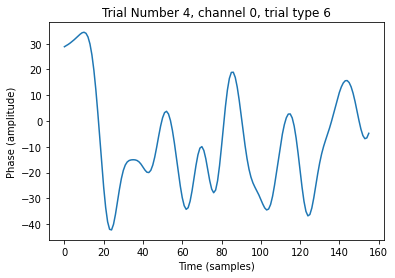

In [6]:
channel_num = 0
trial_num = 4
trial_label = events.loc[trial_num, 'trial_type']

plt.plot(ph_data[:, channel_num, trial_num])
plt.xlabel('Time (samples)')
plt.ylabel('Phase (amplitude)')
plt.title(f'Trial Number {trial_num}, channel {channel_num}, trial type {trial_label}')
plt.show()

### Response time window recording (300-900 ms after response stimulus)

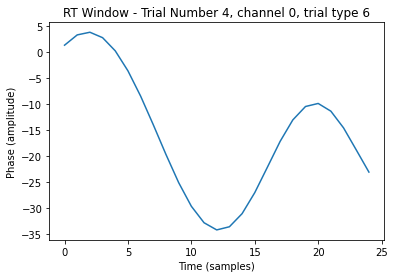

In [7]:
rt_start = int(np.floor((1 + 300. / 1000) * fs))
rt_end = int(np.ceil((1 + 900. / 1000) * fs))

plt.plot(ph_data[rt_start:rt_end, channel_num, trial_num])
plt.xlabel('Time (samples)')
plt.ylabel('Phase (amplitude)')
plt.title(f'RT Window - Trial Number {trial_num}, channel {channel_num}, trial type {trial_label}')
plt.show()

# Data Pre-Processing into Pandas DataFrame

## Store event, trial type, and AC/DC/phase data in Pandas DataFrame

Higher-level organization:
* Subject ID
* Montage type
* Frequency band

Lower-level organization:
* AC/DC/phase can be stored in lists
* Event and trial type as columns
* Header information

Moved to script

In [2]:
data_dir = '/home/nschiou2/EROS/python/'

all_data = pd.read_parquet(os.path.join(data_dir, 'all_single_trial_filt_chan.parquet'))

In [18]:
# Filter phase features only
ph_data = all_data[[c for c in all_data.columns if ('ac_' not in c) and ('dc_' not in c)]]

ph_data.to_parquet(os.path.join(data_dir, 'phase_filt_chan.parquet'), index=False)

In [20]:
# Filter RT window for phase data only
ph_RT = ph_data[[c for c in ph_data.columns if 'rt_' in c]]

ph_RT.to_parquet(os.path.join(data_dir, 'phase_RT_filt_chan.parquet'), index=False)

# Visualize CSP-transformed signals

In [13]:
data_dir = '/shared/rsaas/nschiou2/EROS/python/'

df = pd.read_parquet(os.path.join(data_dir, 'CSP_filt_16_RT.parquet'))

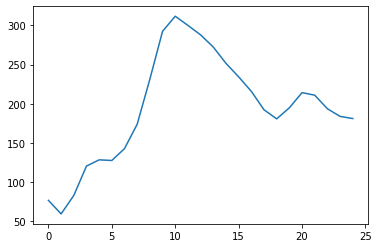

In [16]:
plt.plot(df.loc[0, 'csp_0'])

In [8]:
data_dir = '/shared/rsaas/nschiou2/EROS/python/'

df = pd.read_parquet(os.path.join(data_dir, 'CSP_filt_16_all.parquet'))

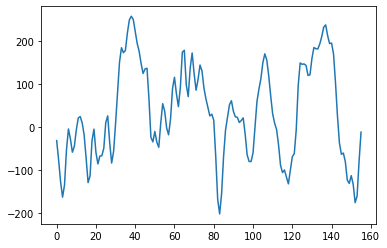

In [11]:
plt.plot(df.loc[0, 'csp_0'])